<a href="https://colab.research.google.com/github/jakepodgurski/Streaming-Services-Comparison/blob/main/Data_303_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the Best Streaming Service for Watching Movies?

My goal with this project was to figure out which streaming service is best for watching good movies. I stumbled upon a data source that has the top 100 movies as per Rotten Tomatoes in each genre. This data source was great except for the fact that the data did not include where each movie was being streamed! My solution was to figure out where all these movies were being streamed by using other data sets that scraped all these streaming websites and had a database of a lot of the titles on each website. After that, I was able to use my data to compare the different streaming sources.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

First, I had to find data sources to compare against the top 100 of each genre data source, so I could identify where each movie is being streamed. None of these data sources were completely comprehensive, so I figured the more the merrier! I ended up using 10 other data sources apart from the top 100 to try and identify where all these movies are being streamed! Links to all the sources are at the bottom of the document.

In [ ]:
top = pd.read_csv("drive/MyDrive/Data 303/Final Project/top_100.csv")
streaming = pd.read_csv("drive/MyDrive/Data 303/Final Project/streaming.csv")
all_streaming = pd.read_csv("drive/MyDrive/Data 303/Final Project/all_streaming.csv")
hotstar = pd.read_csv("drive/MyDrive/Data 303/Final Project/hotstar.csv")
stream_dense = pd.read_csv("drive/MyDrive/Data 303/Final Project/stream_dense.csv")
prime = pd.read_csv("drive/MyDrive/Data 303/Final Project/prime.csv")
netflix = pd.read_csv("drive/MyDrive/Data 303/Final Project/netflix.csv")
hulu = pd.read_csv("drive/MyDrive/Data 303/Final Project/hulu.csv")
hbo_max = pd.read_csv("drive/MyDrive/Data 303/Final Project/hbo_max.csv")
disney = pd.read_csv("drive/MyDrive/Data 303/Final Project/disney.csv")
paramount = pd.read_csv("drive/MyDrive/Data 303/Final Project/paramount.csv")

Before I dove into comparing the data sources with each other, I had to do a small bit of data pre-processing. The format of the titles in the top 100 dataset didn't match the format of the titles in the other datasets, so I created a generalized form to help identify and connect titles from other datasets more easily.

In [ ]:
titleList = []
yearList = []
movieList = []
for movieTitle in top['Title']:
  title = movieTitle[:-7].replace("(", "").replace(")", "")
  year = movieTitle[-5:-1]
  titleList.append(title)
  yearList.append(year)
  movieList.append(title + " " + year)

Next, I created a data frame to hold info on where each movie is being streamed. I was only interested in Netflix, Hulu, Prime Video, HBO Max, Disney+, and Paramount since those were the streaming services with the most data and what I find to be some of the most common.

In [ ]:
data = pd.DataFrame()
data['Title'] = titleList
data['Year'] = yearList
data['Genre'] = top['Genre']
data['Netflix'] = 0
data['Hulu'] = 0
data['Prime'] = 0
data['Max'] = 0
data['Disney'] = 0
data['Paramount'] = 0

Once I created the data frame, the data was ready to be processed. I went through each dataset and looked for each title in the top 100 dataset to try and find all the places where each movie is being streamed. The checking method is a bit crude. I just took the title and release year of the movie from the top 100 dataset and checked to see if the dataset I was checking it against contained the title. With many movies, I would get multiple titles (due to sequels, spinoffs, etc.) so I would check for an exact match. I did not identify where around half the movies in the top 100 dataset are being streamed. The majority of this was fortunately just because none of the websites I chose streamed those movies anyways. Some of the misses though were because sometimes the order of words in the titles in the datasets was different. A method I could use to make a few more identifications would be to break apart titles by word and check for similarities, although this could also lead to false positives. Overall though, I believe my method was effective enough to evaluate the streaming services, because looking at the missed identifications, it seemed that the misses that belonged in the streaming services I chose were mostly random, and they were few and far between.

In [ ]:
# all_streaming.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = all_streaming.loc[(all_streaming['title'].str.contains(title.lower()))
                          & (all_streaming['release_year'] == int(year))
                          & (all_streaming['movie_or_serie'] == 'Movie')]
  if len(val) > 1:
    val = all_streaming.loc[(all_streaming['title'] == title.lower())
                          & (all_streaming['release_year'] == int(year))
                          & (all_streaming['movie_or_serie'] == 'Movie')]
  if len(val) == 1:
    streamer = ""
    if val['channel_streaming'].values[0] == 'hulu-movies-and-tv-shows':
      streamer = 'Hulu'
    elif val['channel_streaming'].values[0] == 'amazon-prime-movies-and-tv-shows':
      streamer = 'Prime'
    elif val['channel_streaming'].values[0] == 'disney-movies-and-tv-shows':
      streamer = 'Disney'
    elif val['channel_streaming'].values[0] == 'netflix-shows':
      streamer = 'Netflix'
    data.loc[(data['Title'] == title) & (data['Year'] == year), streamer] = 1

# streaming.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = streaming.loc[(streaming['Title'].str.contains(title))
                  & (streaming['Year'] == int(year))]
  if len(val) > 1:
    val = streaming.loc[(streaming['Title'] == title)
                    & (streaming['Year'] == int(year))]
  if len(val) == 1:
    streamer = ""
    if val['Netflix'].values[0] == 1:
      streamer = 'Netflix'
    if val['Hulu'].values[0] == 1:
      streamer = 'Hulu'
    if val['Prime Video'].values[0] == 1:
      streamer = 'Prime'
    if val['Disney+'].values[0] == 1:
      streamer = 'Disney'
    data.loc[(data['Title'] == title) & (data['Year'] == year), streamer] = 1

# hotstar.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = hotstar.loc[(hotstar['title'].str.contains(title))
                  & (hotstar['year'] == int(year))
                  & (hotstar['type'] == 'movie')]
  if len(val) > 1:
    val = hotstar.loc[(hotstar['title'] == title)
                    & (hotstar['year'] == int(year))
                    & (hotstar['type'] == 'movie')]
  if len(val) == 1:
    data.loc[(data['Title'] == title) & (data['Year'] == year), 'Disney'] = 1

# stream_dense.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = stream_dense.loc[(stream_dense['title'].str.contains(title))
                  & (stream_dense['release_year'] == int(year))]
  if len(val) > 1:
    val = stream_dense.loc[(stream_dense['title'] == title)
                    & (stream_dense['release_year'] == int(year))]
  if len(val) == 1:
    streamer = ""
    if val['streaming_service'].values[0] == 'netflix':
      streamer = "Netflix"
    if val['streaming_service'].values[0] == 'amazon':
      streamer = "Prime"
    if val['streaming_service'].values[0] == 'hulu':
      streamer = "Hulu"
    if val['streaming_service'].values[0] == 'hbo':
      streamer = "Max"
    if val['streaming_service'].values[0] == 'paramount':
      streamer = "Paramount"
    if val['streaming_service'].values[0] == 'disney':
      streamer = "Disney"
    data.loc[(data['Title'] == title) & (data['Year'] == year), streamer] = 1

# prime.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = prime.loc[(prime['Movie Name'].str.contains(title))
                  & (prime['Year of Release'] == int(year))]
  if len(val) > 1:
    val = prime.loc[(prime['Movie Name'] == title)
                    & (prime['Year of Release'] == int(year))]
  if len(val) == 1:
    data.loc[(data['Title'] == title) & (data['Year'] == year), 'Prime'] = 1

# netflix.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = netflix.loc[(netflix['title'].str.contains(title))
                  & (netflix['release_year'] == int(year))]
  if len(val) > 1:
    val = netflix.loc[(netflix['title'] == title)
                    & (netflix['release_year'] == int(year))]
  if len(val) == 1:
    data.loc[(data['Title'] == title) & (data['Year'] == year), 'Netflix'] = 1

# hulu.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = hulu.loc[(hulu['title'].str.contains(title))
                  & (hulu['release_year'] == int(year))]
  if len(val) > 1:
    val = hulu.loc[(hulu['title'] == title)
                    & (hulu['release_year'] == int(year))]
  if len(val) == 1:
    data.loc[(data['Title'] == title) & (data['Year'] == year), 'Hulu'] = 1

# hbo_max.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = hbo_max.loc[(hbo_max['title'].str.contains(title))
                  & (hbo_max['release_year'] == int(year))]
  if len(val) > 1:
    val = hbo_max.loc[(hbo_max['title'] == title)
                    & (hbo_max['release_year'] == int(year))]
  if len(val) == 1:
    data.loc[(data['Title'] == title) & (data['Year'] == year), 'Max'] = 1

# disney.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = disney.loc[(disney['title'].str.contains(title))
                  & (disney['release_year'] == int(year))]
  if len(val) > 1:
    val = disney.loc[(disney['title'] == title)
                    & (disney['release_year'] == int(year))]
  if len(val) == 1:
    data.loc[(data['Title'] == title) & (data['Year'] == year), 'Disney'] = 1

# paramount.csv
for movie in movieList:
  title = movie[:-5]
  year = movie[-4:]
  val = paramount.loc[(paramount['title'].str.contains(title))
                  & (paramount['release_year'] == int(year))]
  if len(val) > 1:
    val = paramount.loc[(paramount['title'] == title)
                    & (paramount['release_year'] == int(year))]
  if len(val) == 1:
    data.loc[(data['Title'] == title) & (data['Year'] == year), 'Paramount'] = 1

Once I built the dataframe identifying where each movie from the top 100 of each genre was being streamed, it was time to analyze the data. The first method of analysis I wanted to do was to look at how many of the top 100 movies in each genre were being streamed by each streaming service. The method of visualization I chose was bar graphs because the bars make it visually pretty easy to see how the number of top 100 movies streamed by each service in each genre compare.

In [ ]:
streamers = ['Netflix', 'Hulu', 'Prime', 'Max', 'Disney', 'Paramount']
bar_df = pd.DataFrame()
bar_df['Genre'] = data['Genre'].unique()
for s in streamers:
  bar_df[s] = 0
for genre in data['Genre'].unique():
  for s in streamers:
    bar_df.loc[bar_df['Genre'] == genre, s] = (sum(data.loc[data['Genre'] == genre, s]))

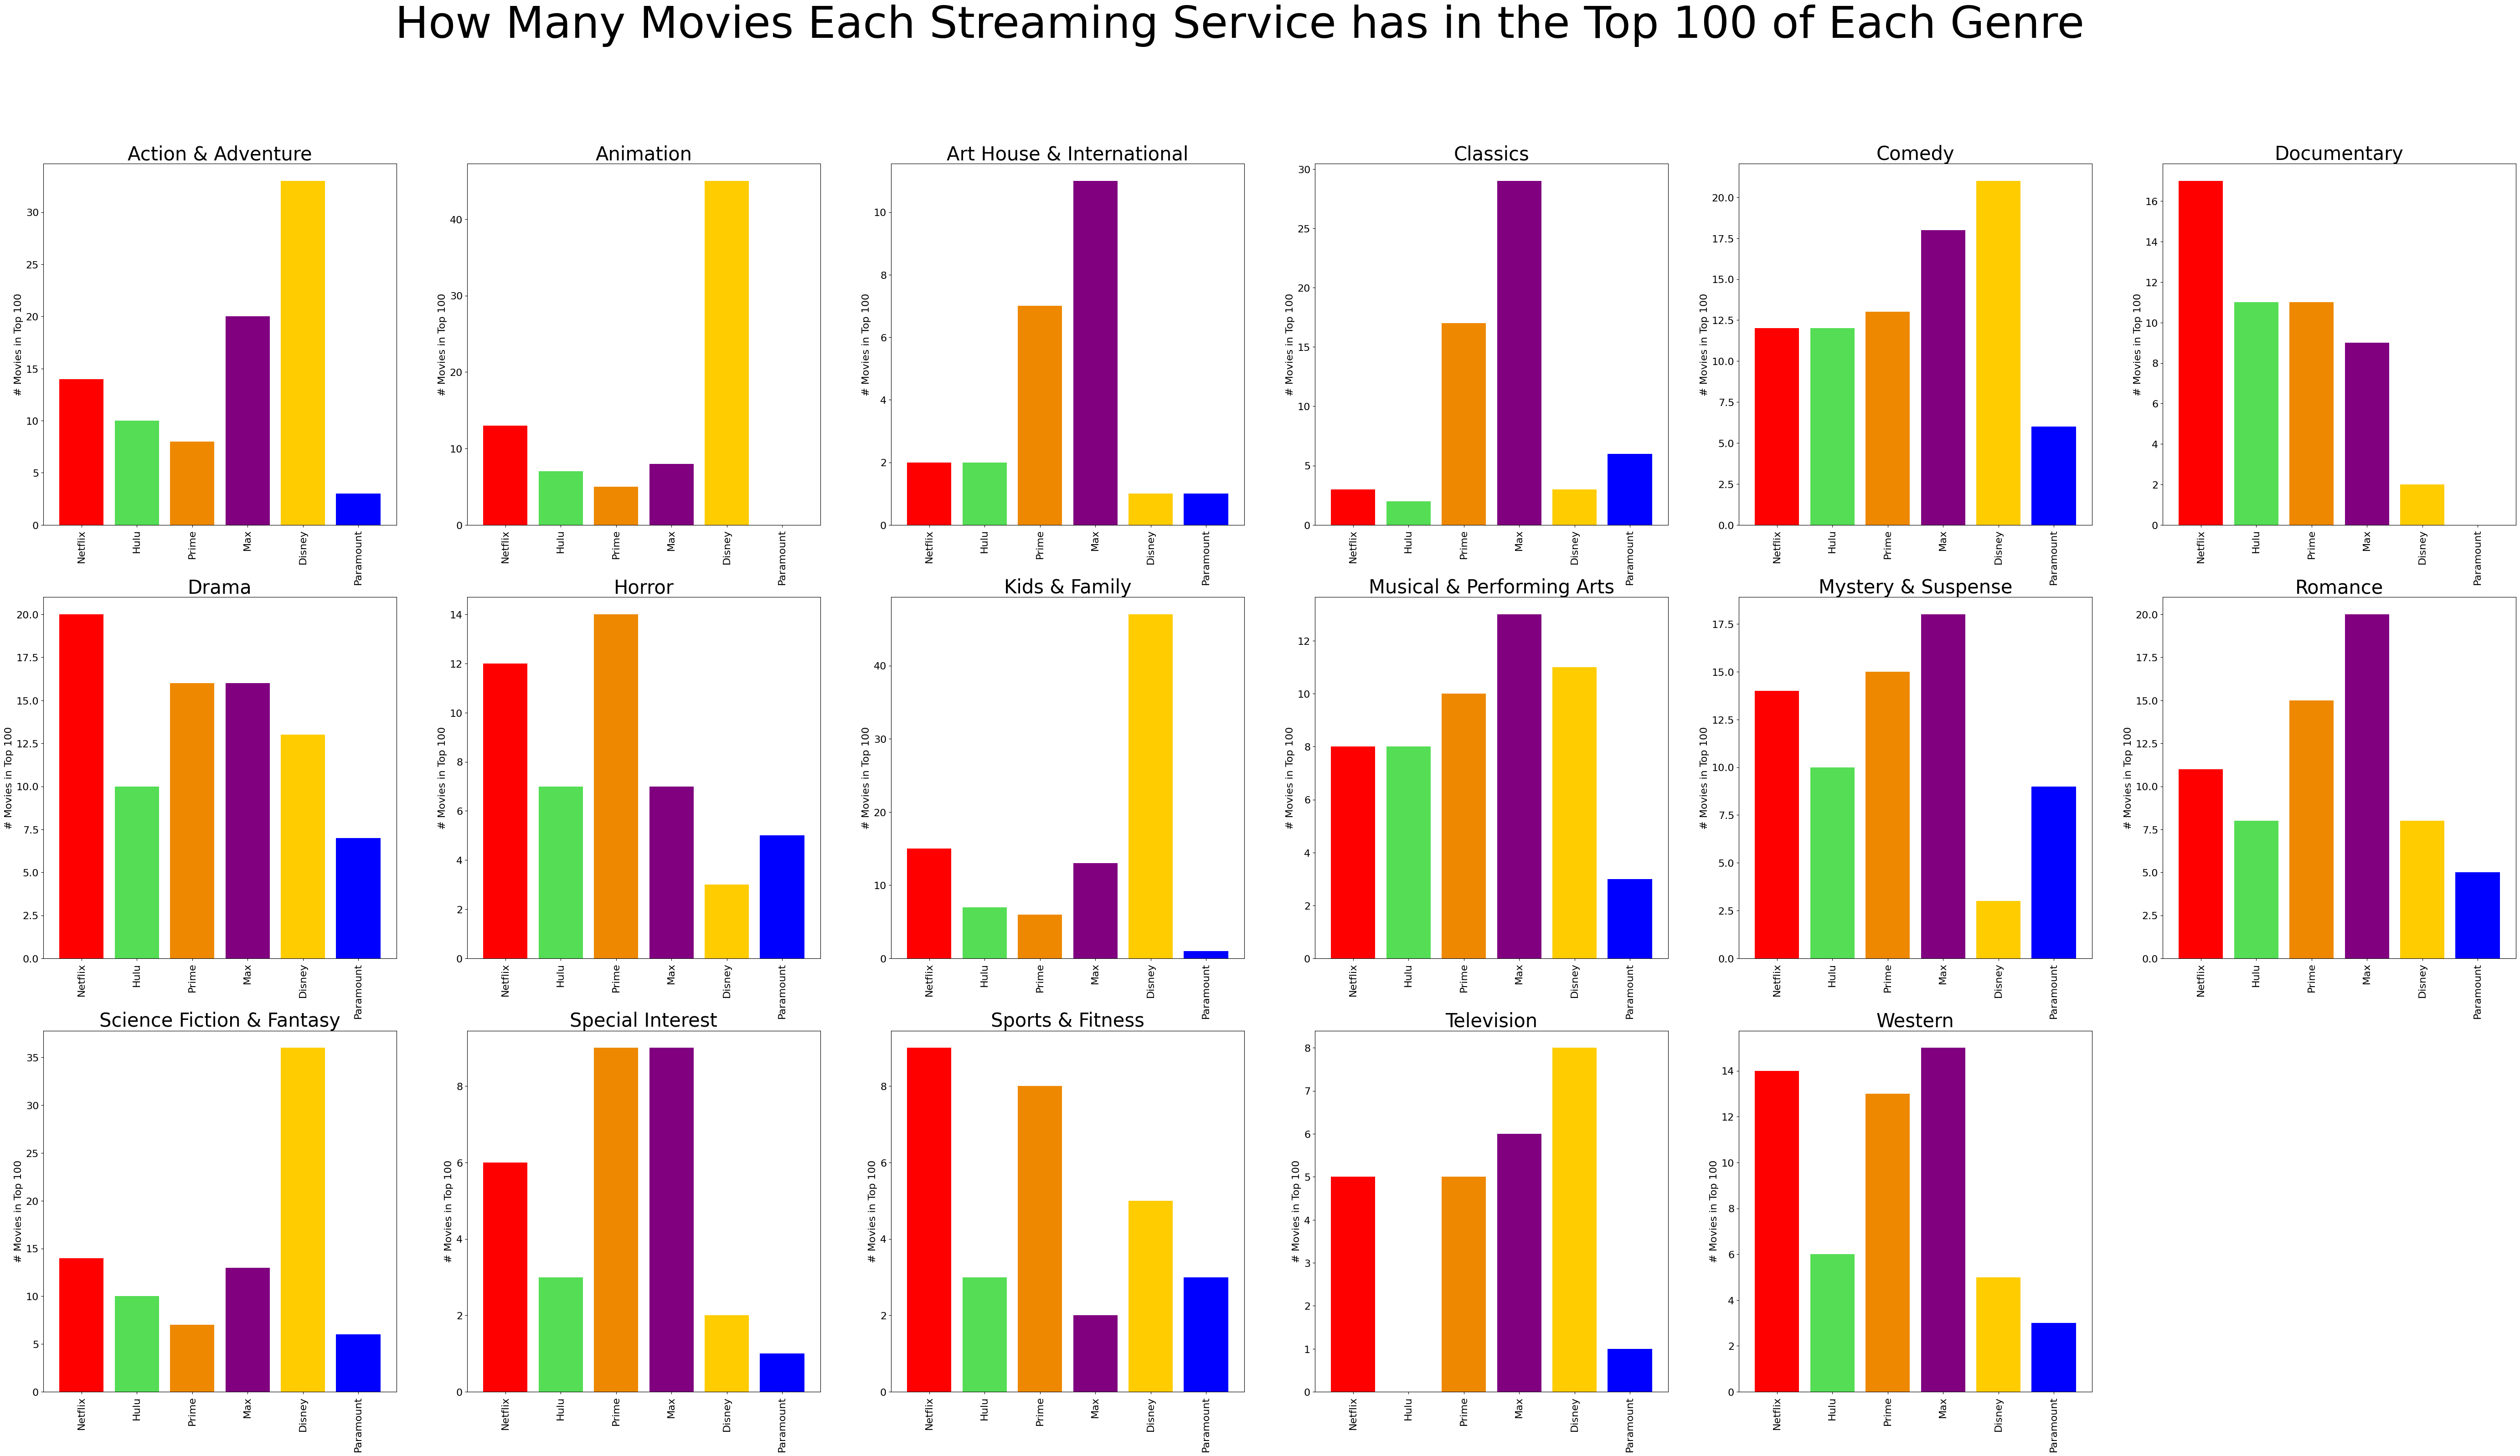

In [ ]:
genres = bar_df['Genre']
colors=['red', '#55dd55', '#ee8800', 'purple', '#ffcc00', 'blue']

fig, ax = plt.subplots(3,6, figsize =(70,35))
for i in range(len(bar_df['Genre'])):
  plt.subplot(3, 6, i+1)
  plt.bar(bar_df.columns[1:], bar_df.iloc[i, 1:].values, color=colors)
  plt.ylabel("# Movies in Top 100", fontsize = 16)
  plt.xticks(rotation='vertical', fontsize = 16)
  plt.yticks(fontsize = 16)
  plt.title(bar_df['Genre'][i], fontsize=30)

fig.suptitle("How Many Movies Each Streaming Service has in the Top 100 of Each Genre", fontsize=70)
fig.delaxes(ax[2, 5])
plt.show()

Looking at all these bar graphs is a bit overwhelming, but it is pretty easy to see which streaming service leads in each genre. By taking a wide look at all the bar graphs, it appears that Disney and Max lead in a lot of the categories. If you're looking for a specific genre on movie night, this a pretty helpful visual to see which streaming service you should check out first to find a good movie! I selected colors based on the colors each streaming service uses in their logos and on their webpage. One thing this visual does not do well is comparison between genres, as these visuals do not have a standardized y-axis height. I did this on purpose though because I did not design this visual for comparison between genres, and I had another visual in mind for that job.

I made a stacked bar chart so I could see how many of the top 100 in each genre are covered by the streaming services, and so I could get a better look at the spread of each service between categories. I find it very interesting how Netflix, Hulu, Prime, and Max seem to have a pretty general spread across all the genres, but Disney and Paramount seem to specialize in certain genres.

[]

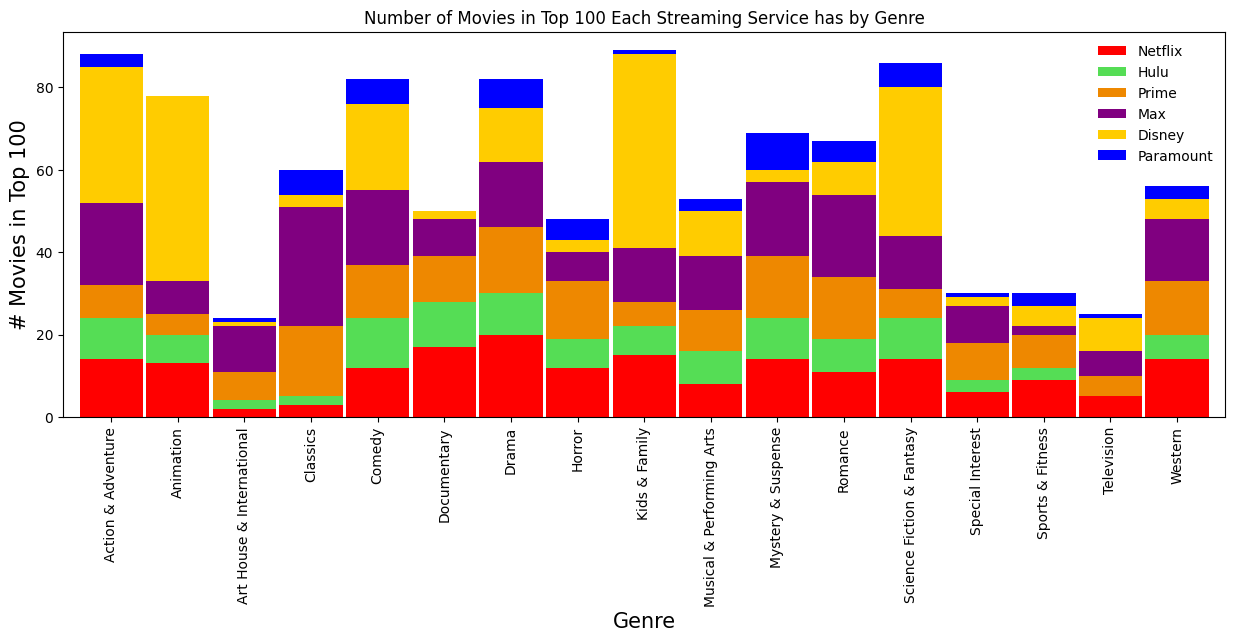

In [ ]:
bar_df.plot(x='Genre', kind='bar', stacked=True, width = 0.95, figsize = [15, 5],
        title='Number of Movies in Top 100 Each Streaming Service has by Genre',
            color=['red', '#55dd55', '#ee8800', 'purple', '#ffcc00', 'blue'])
plt.ylabel("# Movies in Top 100", fontsize = 15)
plt.xlabel("Genre", fontsize = 15)
plt.legend(frameon=False)
plt.plot()

While the stacked bar chart is a good visual for seeing the spread of each streaming service, I don't think it fully accomplishes the goal of determining which streaming service is best. We can begin to see the total volume of top 100 movies each streaming service has, but it's not the best visual for that either. The only way to begin to fully answer the question of which streaming service is best is to look at which streaming service has the most top 100 movies in total. Although a bit repetitive, I once again found that a bar chart is great for comparing the raw count of the top 100 movies each streaming service has.

In [ ]:
len(bar_df.iloc[0, 1:])

6

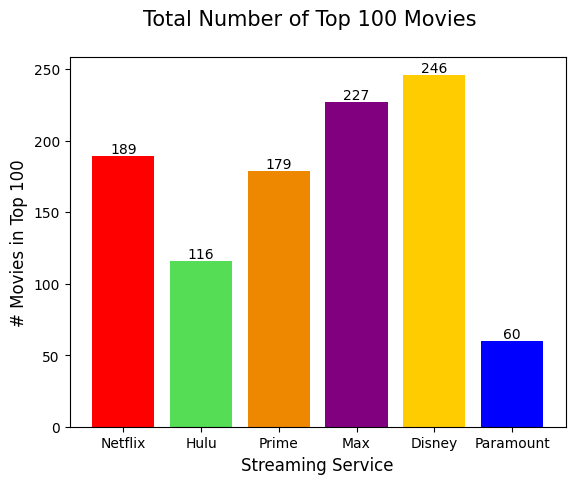

In [ ]:
streamer_sums = []
for s in streamers:
  streamer_sums.append(sum(bar_df[s].values))
streamer_sums

colors=['red', '#55dd55', '#ee8800', 'purple', '#ffcc00', 'blue']

fig, ax = plt.subplots(1, 1)
plt.bar(bar_df.columns[1:], streamer_sums, color=colors)
plt.ylabel("# Movies in Top 100", fontsize = 12)
plt.xlabel("Streaming Service", fontsize = 12)
fig.suptitle("Total Number of Top 100 Movies", fontsize=15)
for i in range(len(bar_df.iloc[0, 1:])):
  plt.text(i, streamer_sums[i]+2, streamer_sums[i], ha = 'center')
plt.show()

Not entirely to my surprise, Disney came out on top. But this answer isn't enough. The fact that Disney performed really well in genres where these services all had a good number of entries but very poorly in some of the middle to less-populated genres made it feel like Disney was just capitalizing on the easy categories. I think the best streaming service would offer a lot of breadth; a wide selection of top movies from all genres. So, I made one last visualization that takes into consideration the volume of the top 100 movies by these streaming services in each genre. By negatively weighing the number of entries a streaming service had in a category by the total number the streaming services had in that category, I found a different result for who the best streaming service is.

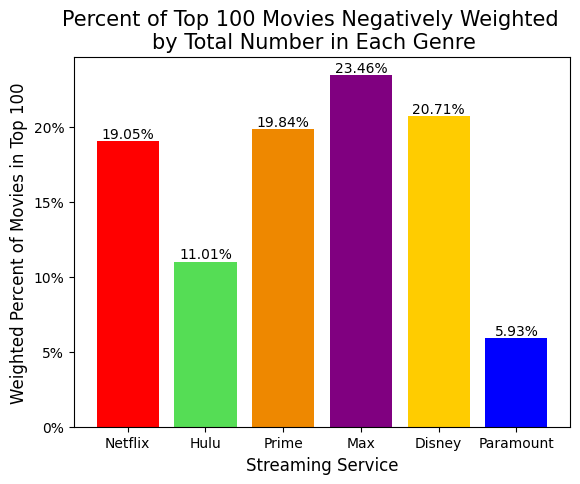

In [ ]:
streamer_proportions = [0, 0, 0, 0, 0, 0]
for i in bar_df.index:
  total = sum(bar_df.iloc[i, 1:].values)
  for j in range(len(bar_df.iloc[i, 1:].values)):
    streamer_proportions[j] += bar_df.iloc[i, j+1]/total
for i in range(len(streamer_proportions)):
  streamer_proportions[i] /= len(bar_df['Genre'])

colors=['red', '#55dd55', '#ee8800', 'purple', '#ffcc00', 'blue']

fig, ax = plt.subplots(1, 1)
plt.bar(bar_df.columns[1:], streamer_proportions, color=colors)
plt.ylabel("Weighted Percent of Movies in Top 100", fontsize = 12)
plt.xlabel("Streaming Service", fontsize = 12)
plt.yticks([0, 0.05, 0.10, 0.15, 0.20], ["0%", "5%", "10%", "15%", "20%"])
fig.suptitle("Percent of Top 100 Movies Negatively Weighted \nby Total Number in Each Genre", fontsize=15)
for i in range(len(bar_df.iloc[0, 1:])):
  plt.text(i, streamer_proportions[i]+.002, (str(round(streamer_proportions[i], 4)*100) + "%"), ha = 'center')
plt.show()

By applying negative weight to categories with a high volume of entries from these services, we find that Max is the best streaming service! I agree with this result because in my personal movie-watching experience I have found that Max has offered lots of good movies to watch, and has a good variety of genres to choose from. Disney, Prime, and Netflix were all close runner-ups, but Hulu and Paramount were lacking on all fronts.

Using the results from all the visualizations, Max and Disney are the clear top two streaming services. While I personally would choose Max because I like having a variety of genres to choose from, Disney provides the greatest number of top 100 movies to watch, so if someone is just interested in watching tons of movies, Disney would probably be the best choice for them.

Data Sources:

https://www.kaggle.com/datasets/prasertk/top-100-rotten-tomatoes-movies-by-genres

https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

https://www.kaggle.com/datasets/sc0v1n0/4-services-streaming-movies-and-tv

https://www.kaggle.com/datasets/goelyash/disney-hotstar-tv-and-movie-catalog

https://www.kaggle.com/datasets/farhantanveerhasan/movie-stream-df

https://www.kaggle.com/datasets/pavandas/amazon-prime-videos

https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=titles.csv

https://www.kaggle.com/datasets/victorsoeiro/hulu-tv-shows-and-movies?select=titles.csv

https://www.kaggle.com/datasets/victorsoeiro/hbo-max-tv-shows-and-movies?select=titles.csv

https://www.kaggle.com/datasets/victorsoeiro/disney-tv-shows-and-movies?select=titles.csv

https://www.kaggle.com/datasets/victorsoeiro/paramount-tv-shows-and-movies?select=titles.csv